Data Loaded Successfully!


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1



Missing Values:
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

Outliers Capped Successfully.


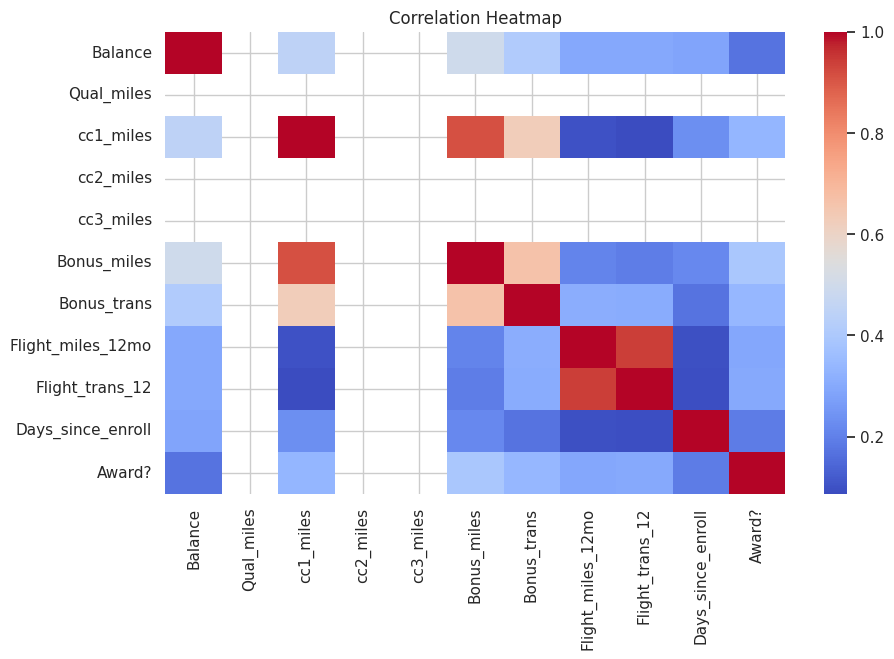

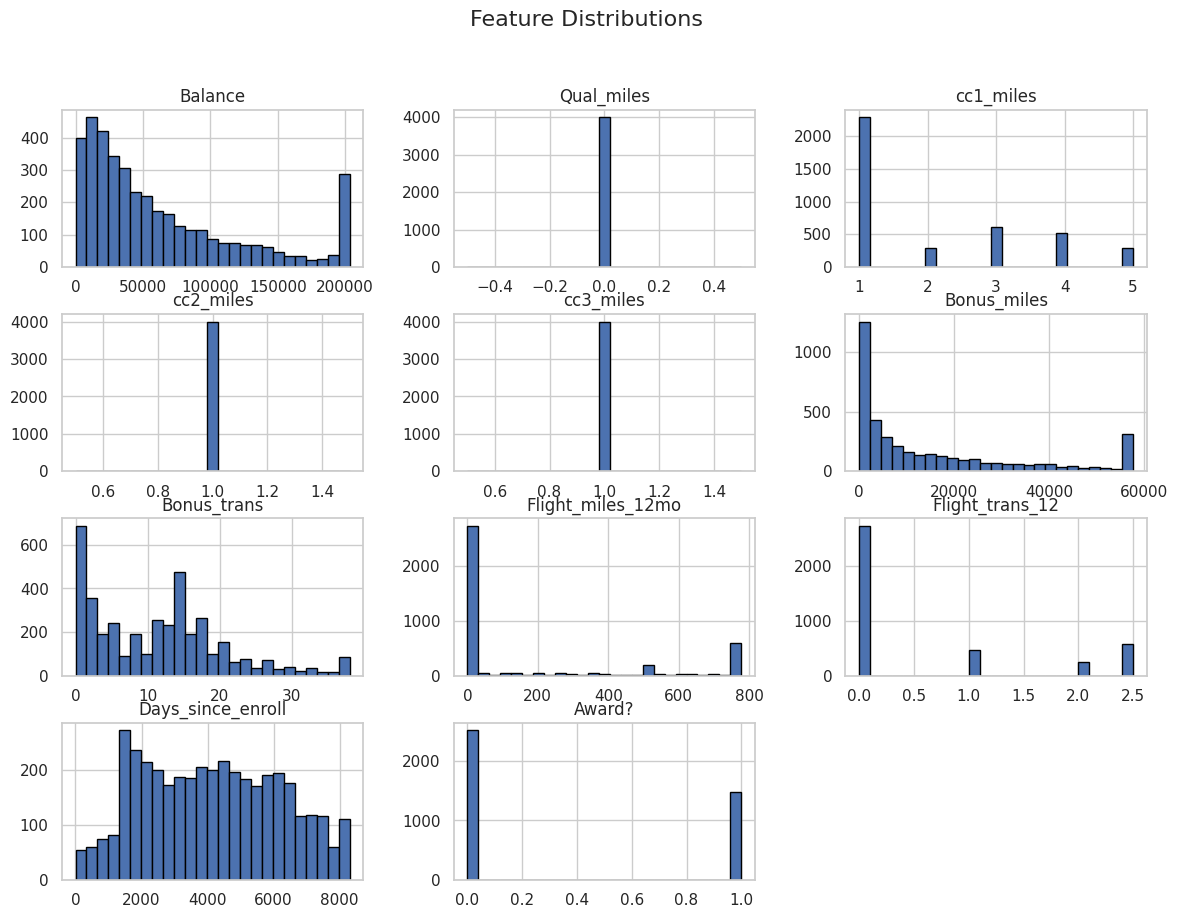

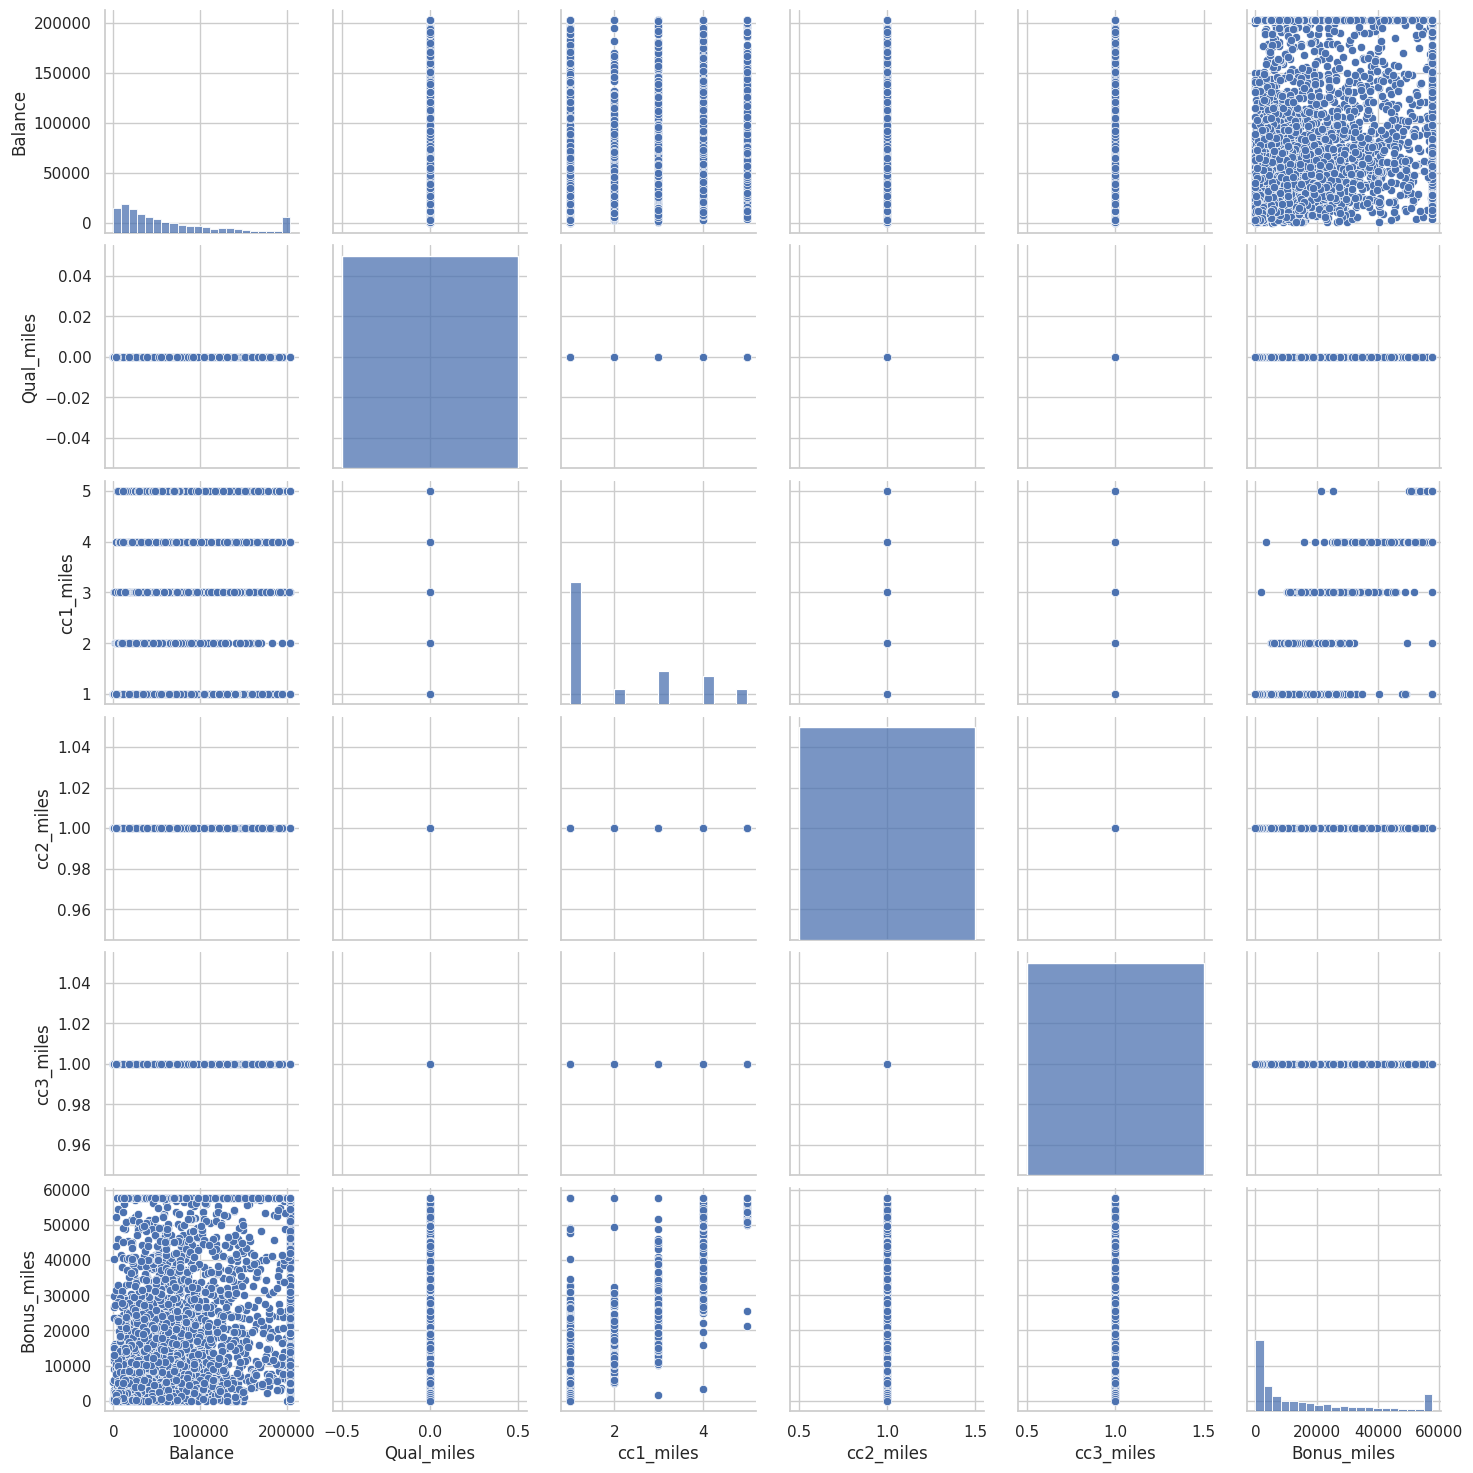

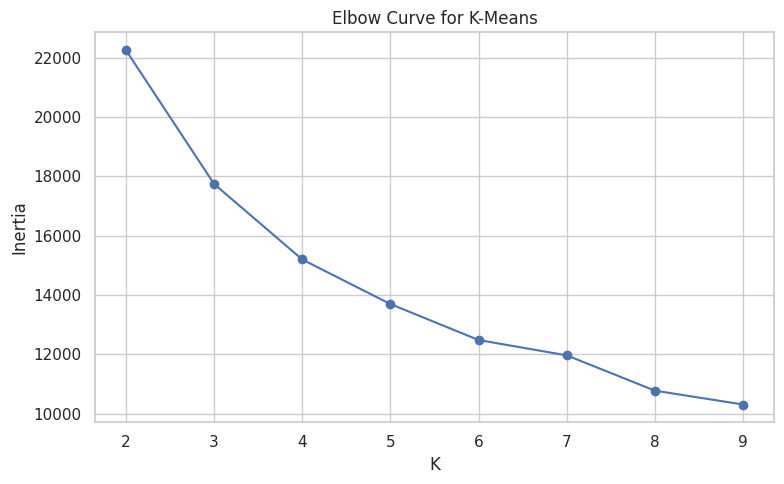


KMeans Silhouette Score: 0.32931591228742907


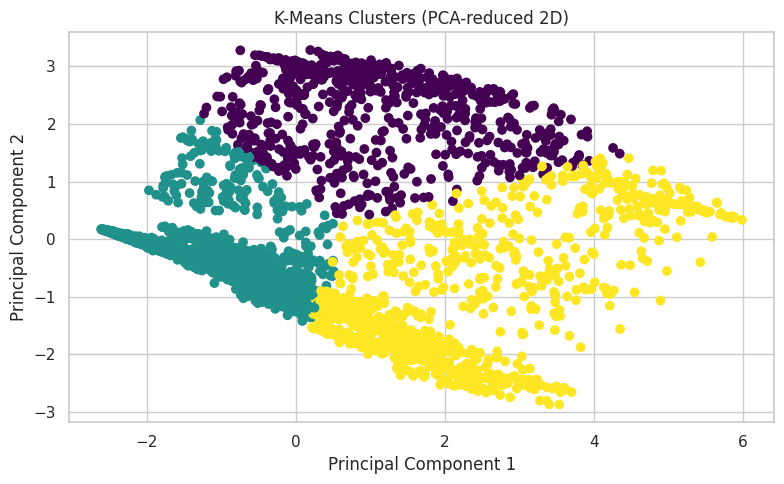

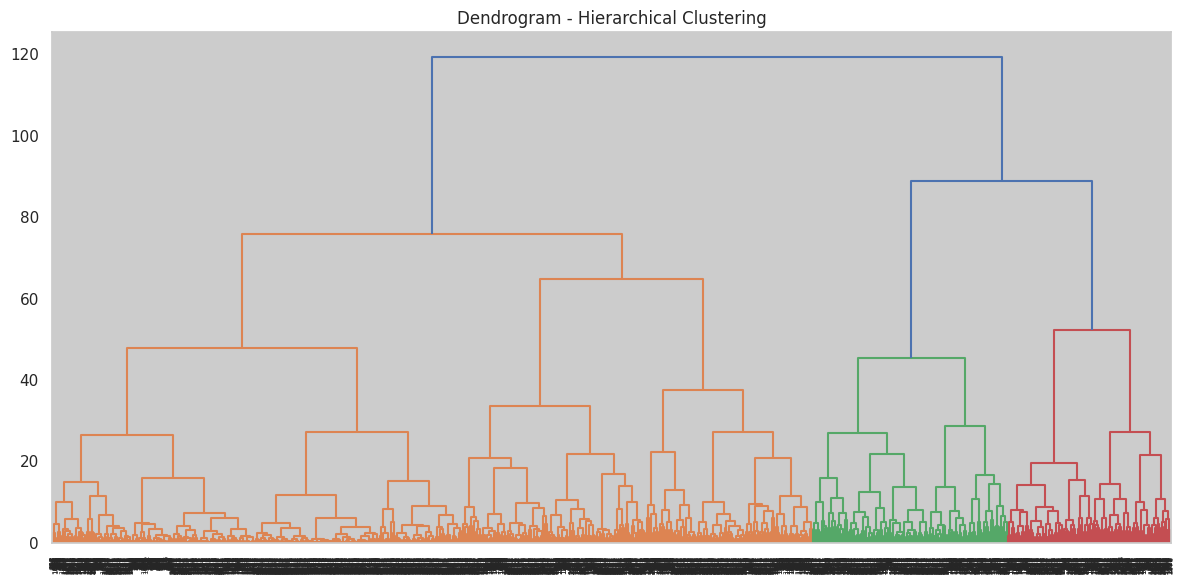

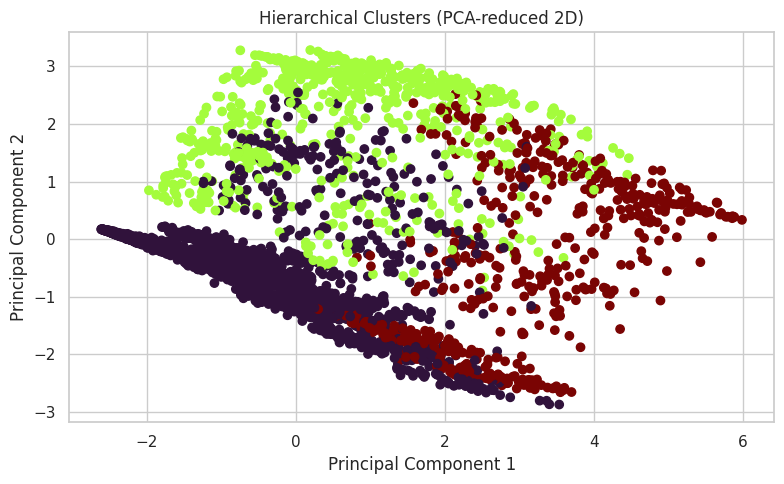


DBSCAN Silhouette Score: 0.2415544373261711


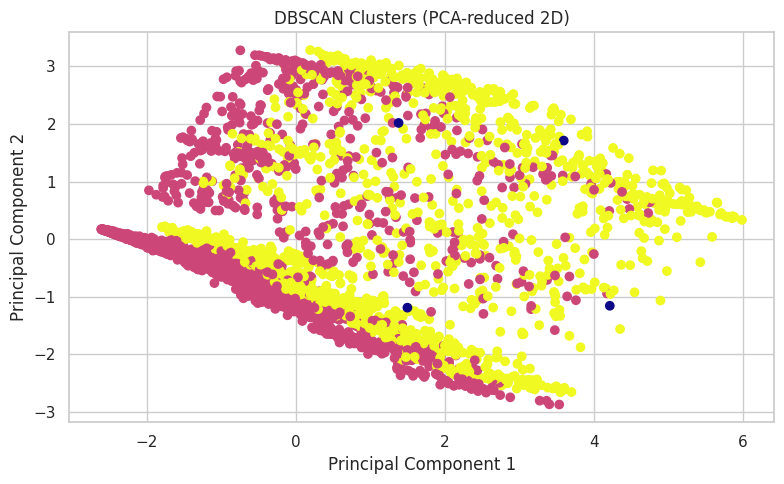


===== KMeans Cluster Summary ====


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hier_Cluster,DBSCAN_Cluster
KMeans_Cluster,,,,,,,,,,,,,
0,82647.615767,0.0,1.518466,1.0,1.0,11474.393466,12.943182,671.321023,2.166903,4211.723011,0.568182,1.965909,0.562500
1,37929.876775,0.0,1.334960,1.0,1.0,5231.809339,7.204969,18.937445,0.085182,3688.236025,0.181012,1.057232,0.181012
2,106948.041066,0.0,3.994236,1.0,1.0,40112.431076,19.710855,189.000480,0.622478,4987.302594,0.646494,2.012488,0.643612



===== Hierarchical Cluster Summary ====


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,DBSCAN_Cluster
Hier_Cluster,,,,,,,,,,,,,
1,51716.720853,0.0,1.748805,1.0,1.0,10115.450349,9.183891,25.911732,0.099669,3934.371828,0.260022,1.142700,0.259287
2,78522.887374,0.0,1.441894,1.0,1.0,9787.424677,11.642755,609.373745,1.993544,4051.479197,0.375897,0.317073,0.373027
3,102337.149228,0.0,4.246998,1.0,1.0,46829.789880,21.929674,371.967410,1.209262,5057.771870,0.878216,1.728988,0.873070



===== DBSCAN Cluster Summary ====


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,Hier_Cluster
DBSCAN_Cluster,,,,,,,,,,,,,
-1,79239.500000,0.0,2.000000,1.0,1.0,55394.687500,29.500000,474.875000,1.500000,3308.750000,0.75,1.000000,2.250000
0,56036.732420,0.0,1.704013,1.0,1.0,9930.050358,9.100516,111.666468,0.373858,3820.332539,0.00,1.025030,1.228447
1,76894.019621,0.0,2.665088,1.0,1.0,24635.992219,15.458051,290.311570,0.959743,4628.624493,1.00,1.185386,1.868065



 COMPLETE: Clustering, Preprocessing, Outlier Handling, VIZ Done Successfully!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA # Import PCA

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

# ================================================================
# 1. LOAD DATA
# ================================================================

# Ensure the 'EastWestAirlines.xlsx' file is uploaded to '/content/' or update the path accordingly.
# To upload, click the folder icon on the left sidebar, then the upload icon, and select your file.
df = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name="data")
print("Data Loaded Successfully!")
display(df.head())

# ================================================================
# 2. DATA PREPROCESSING
# ================================================================

# Drop categorical ID field if present
df = df.drop(columns=["ID#"], errors="ignore")

# Check missing
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing with median
df = df.fillna(df.median())

# Outlier Treatment using IQR
def treat_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

for col in df.columns:
    treat_outliers(col)

print("\nOutliers Capped Successfully.")

# Scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

# --- PCA for 2D visualization ---
pca = PCA(n_components=2)
scaled_df_pca = pca.fit_transform(scaled_df)


# ================================================================
# 3. EDA VISUALIZATIONS
# ================================================================

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution Example
df.hist(bins=25, figsize=(14,10), edgecolor='black')
plt.suptitle("Feature Distributions", size=16)
plt.show()

# Pairplot (sample to avoid heavy visuals)
sns.pairplot(df.iloc[:, :6])
plt.show()

# ================================================================
# 4. K-MEANS CLUSTERING
# ================================================================

inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    inertia.append(km.inertia_)

# Elbow Curve
plt.figure() # Ensure a new figure for the elbow curve
plt.plot(range(2, 10), inertia, marker='o')
plt.title("Elbow Curve for K-Means")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.tight_layout() # Add tight layout for better spacing
plt.show()

# Choose K=3 (based on elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)
k_labels = kmeans.labels_
df["KMeans_Cluster"] = k_labels

# Silhouette Score
k_sil = silhouette_score(scaled_df, k_labels)
print("\nKMeans Silhouette Score:", k_sil)

# Visualize Clusters using PCA
plt.figure() # Ensure a new figure for K-Means clusters
plt.scatter(scaled_df_pca[:, 0], scaled_df_pca[:, 1], c=k_labels, cmap="viridis")
plt.title("K-Means Clusters (PCA-reduced 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout() # Add tight layout for better spacing
plt.show()

# ================================================================
# 5. HIERARCHICAL CLUSTERING
# ================================================================

Z = linkage(scaled_df, method="ward")

plt.figure(figsize=(12,6))
dendrogram(Z)
plt.title("Dendrogram - Hierarchical Clustering")
plt.tight_layout() # Add tight layout for better spacing
plt.show()

# Select clusters (3 as example)
h_labels = fcluster(Z, 3, criterion="maxclust")
df["Hier_Cluster"] = h_labels

# Visualize using PCA
plt.figure() # Ensure a new figure for Hierarchical clusters
plt.scatter(scaled_df_pca[:, 0], scaled_df_pca[:, 1], c=h_labels, cmap="turbo")
plt.title("Hierarchical Clusters (PCA-reduced 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout() # Add tight layout for better spacing
plt.show()

# ================================================================
# 6. DBSCAN CLUSTERING
# ================================================================

db = DBSCAN(eps=1.8, min_samples=8)
db_labels = db.fit_predict(scaled_df)

df["DBSCAN_Cluster"] = db_labels

# Silhouette score (ignore noise -1)
valid = df[df["DBSCAN_Cluster"] != -1]
if valid.shape[0] > 0:
    # Ensure 'scaled_df' is used for silhouette calculation, aligning with the clustering input
    # and filter it based on valid DBSCAN labels
    db_sil = silhouette_score(scaled_df[df["DBSCAN_Cluster"] != -1], valid["DBSCAN_Cluster"])
    print("\nDBSCAN Silhouette Score:", db_sil)

# --- Visualize DBSCAN with PCA for better representation --- (Already using PCA)
plt.figure() # Ensure a new figure for DBSCAN clusters
plt.scatter(scaled_df_pca[:, 0], scaled_df_pca[:, 1], c=db_labels, cmap="plasma")
plt.title("DBSCAN Clusters (PCA-reduced 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout() # Add tight layout for better spacing
plt.show()

# ================================================================
# 7. CLUSTER CHARACTERISTICS (Insights)
# ================================================================

print("\n===== KMeans Cluster Summary ====")
display(df.groupby("KMeans_Cluster").mean())

print("\n===== Hierarchical Cluster Summary ====")
display(df.groupby("Hier_Cluster").mean())

print("\n===== DBSCAN Cluster Summary ====")
display(df.groupby("DBSCAN_Cluster").mean())

# ================================================================
# END OF SCRIPT
# ================================================================

print("\n COMPLETE: Clustering, Preprocessing, Outlier Handling, VIZ Done Successfully!")